In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import scipy.stats as st
from math import pi,exp
from scipy.ndimage.filters import generic_filter as gf
from scipy.ndimage import binary_dilation,binary_erosion

In [0]:
def AddBorders(img,filter_size):
    border_size=(filter_size-1)/2
    temp=np.zeros((img.shape[0]+2*(border_size),img.shape[1]+2*(border_size)))
    temp[border_size:-border_size,border_size:-border_size]=img
    return temp
def round_kern(size):
    radius=size/2+1
    kernel = np.zeros((radius/2+1, radius/2+1))
    y,x = np.ogrid[-radius+1:radius, -radius+1:radius]
    mask = x**2 + y**2 <= radius**2
    return mask.astype(int)
def morphology(img,kern_size,mode='dilation'):
    width=img.shape[1]
    height=img.shape[0]
    border=kern_size/2
    img=AddBorders(img,kern_size)
    new_img=np.zeros((height+border*2,width+border*2))
    #print(new_img.shape,img.shape)
    kernel=round_kern(kern_size)
    if mode=='dilation':
        for i in range(0,height):
            for j in range(0,width):
                if img[i+kern_size/2][j+kern_size/2]==1:
                    #print(i+kern_size/2,j+kern_size/2)
                    new_img[i:i+kern_size,j:j+kern_size]=\
                    np.logical_or(new_img[i:i+kern_size,j:j+kern_size],kernel).astype(int)
                    #new_img[i:i+kern_size,j:j+kern_size]=kernel#np.ones((kern_size,kern_size))
    if mode=='erosion':
        kernel_sum=kernel.sum()
        print(kernel_sum)
        for i in range(0,height-1):
            for j in range(0,width-1):
                if (img[i:i+kern_size,j:j+kern_size]*kernel).sum()==kernel_sum:
                    #print(i,j)
                    new_img[i+kern_size/2][j+kern_size/2]=1
    return new_img[border:-border,border:-border]

In [0]:
a=np.zeros((200,200))
a[40:140,30:60]=np.ones_like(a[40:140,30:60])
a[70:110,60:90]=np.ones_like(a[70:110,60:90])
a[40:140,90:130]=np.ones_like(a[40:140,90:130])

In [0]:
r=21
r1=r/2
my_result=morphology(a,r,mode='dilation')
lib_result=binary_dilation(a,structure=round_kern(r))

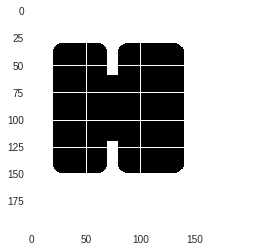

In [12]:
plt.imshow(lib_result,interpolation='none')

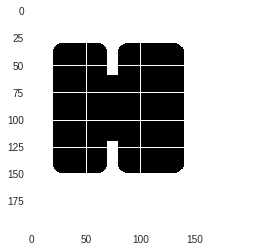

In [13]:
plt.imshow(my_result,interpolation='none')